# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Steps:**

:-Importing necessary libraries

:-Loading the data

:-Data Visualization

:-Data preprocessing

:-Model selection

:-Submission

Importing Modules and Loading Dataset

In [ ]:
# importing library's and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')



Mount Drive and Import the Dataset

In [ ]:
# connecting to drive for data set
from google.colab import drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# storing the seol bike dataset from google drive
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'latin')


Now Comes to the Data

In [ ]:
# Exploring Dataset
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Now viewing first 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Viewing last 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Check random rows
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2158,28/02/2018,13,22,2.3,96,1.9,1207,1.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2935,02/04/2018,918,7,15.1,80,1.0,623,11.6,0.01,0.0,0.0,Spring,No Holiday,Yes
5052,29/06/2018,1168,12,26.1,67,2.2,758,19.4,2.15,0.0,0.0,Summer,No Holiday,Yes
8140,05/11/2018,107,4,8.0,81,0.4,666,4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
2840,29/03/2018,1281,8,13.3,80,1.2,369,9.9,0.14,0.0,0.0,Spring,No Holiday,Yes
5980,07/08/2018,201,4,27.3,68,0.7,2000,20.8,0.00,0.0,0.0,Summer,No Holiday,Yes
7550,11/10/2018,991,14,13.4,32,4.9,2000,-2.9,1.78,0.0,0.0,Autumn,No Holiday,Yes
3484,25/04/2018,117,4,6.4,66,0.5,2000,0.4,0.00,0.0,0.0,Spring,No Holiday,Yes
8516,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
2356,09/03/2018,66,4,2.5,76,1.0,403,-1.3,0.00,0.0,0.0,Spring,No Holiday,Yes


In [ ]:
#look for the shape of dataset
df.shape

(8760, 14)

In [ ]:
#check details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#check columns of the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#get the unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#description of the dataset to get insights of the data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#check for the missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#now checking the duplicate values in the dataset
df.duplicated().sum()

0

***Python read "Date" column as an object type,so the date column is very important to analyze the user behaviour so we need to convert it into datetime format.***

In [ ]:
#changing the date column into 'year','month','day' column
df["Date"]=pd.to_datetime(df["Date"])

df["weekdays"] = df["Date"].dt.day_name()
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

df.drop("Date",axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekdays                   8760 non-null   objec

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,year,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,2017,1,12


# **Exploratory Data Analysis of the Data**

**Importance Of EDA**

...Exploratory Data Analysis is a critical step in the machine learning pipeline that helps ensure the quality and suitability of the data, lays the foundation for feature engineering and model selection, and provides valuable insights into the problem domain. It aids in making informed decisions and significantly influences the success of a machine learning project..

**Dependent Variable In Data Set**

A dependent variable is a variable whose value will change depending on the value of another variable.Here we analyse our dependent variable.

**Univariate Analysis of the Data Set**

The main objective of univariate analysis is to simply describe the data to find patterns within the data.

*Count of Rented Bikes according to weekdays and weekend*

[Text(0.5, 1.0, 'count of rented bikes according to weekdays')]

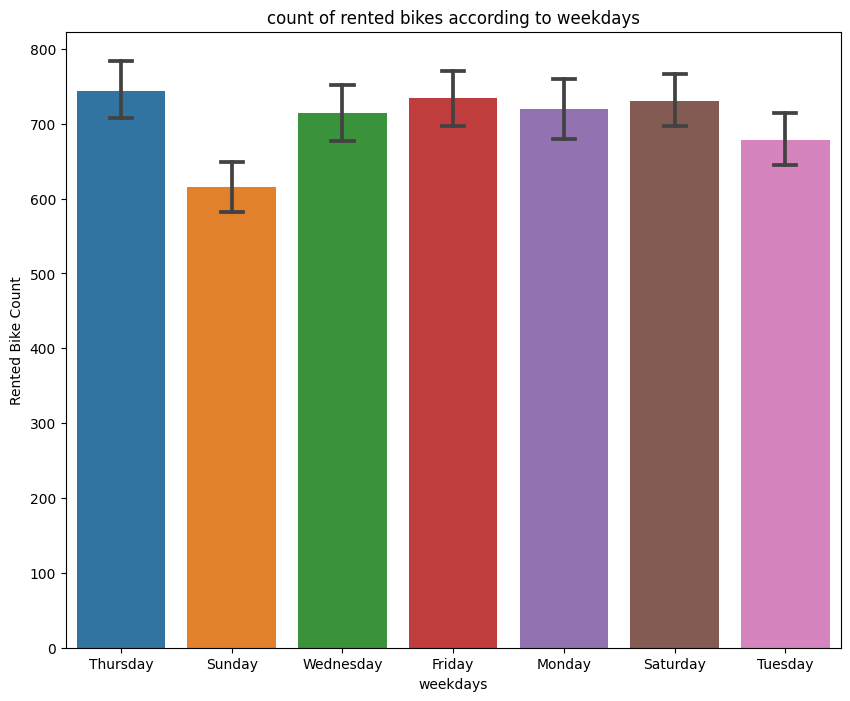

In [ ]:
# Now analysis of data visualization according to weekdays and weekend of the rented bikes
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='count of rented bikes according to weekdays')

Except Sunday and Tuesday the rental bikes booking is almost same in all other days.

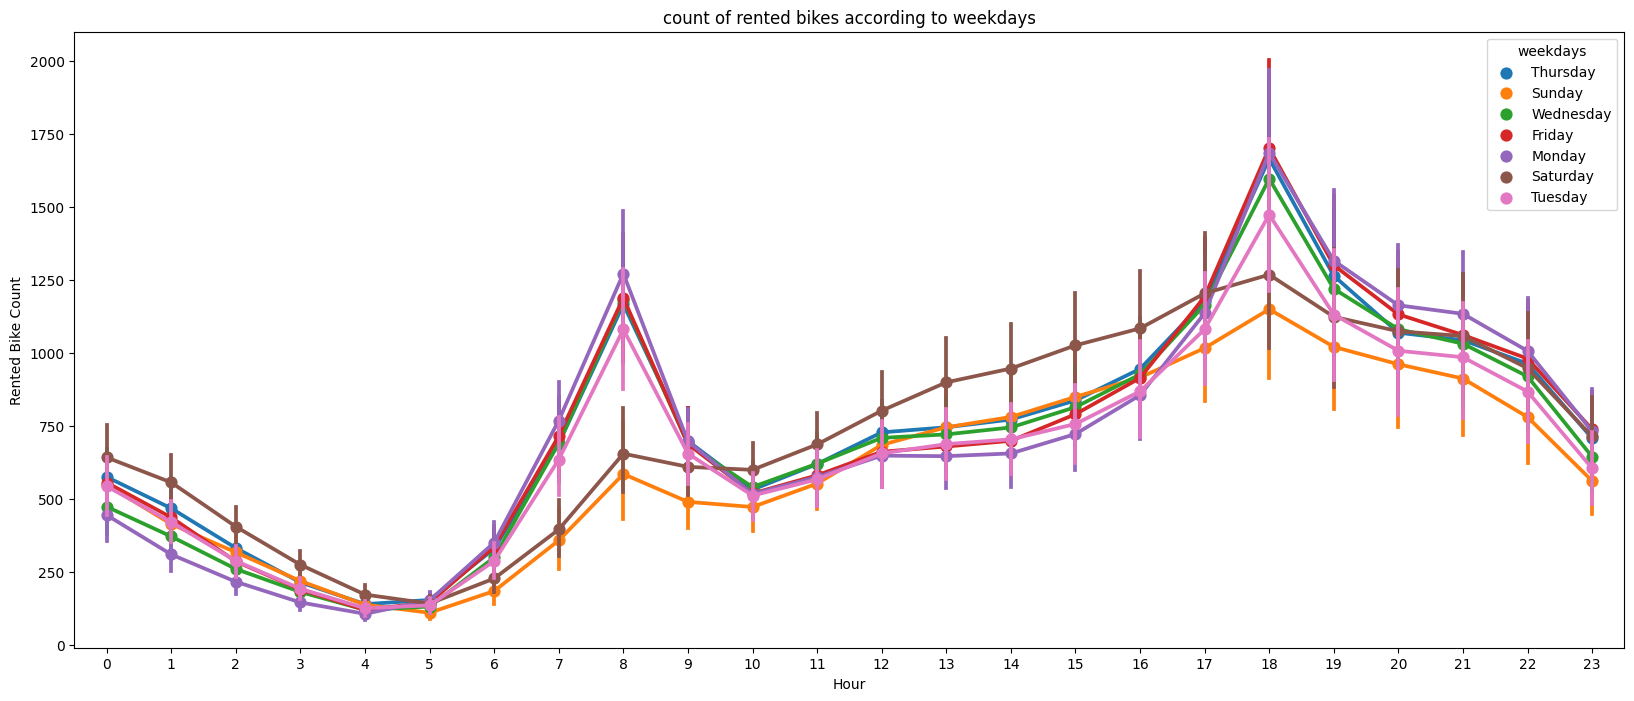

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekdays',ax=ax)
ax.set(title='count of rented bikes according to weekdays')
plt.show()

From above point plot and bar plot we can say that in the weekdays which represent in blue colour shows that the demand of the bikes higher because of the office timing.Peak time are 7 am to 9 am and 5 pm to 7 pm.
.Orange colour shows the weekend days,and it shows that the demand of bikes are very low in the morning but slightly increase in evening 4 pm to 8 pm.

***Count of Rented Bikes according to their month***


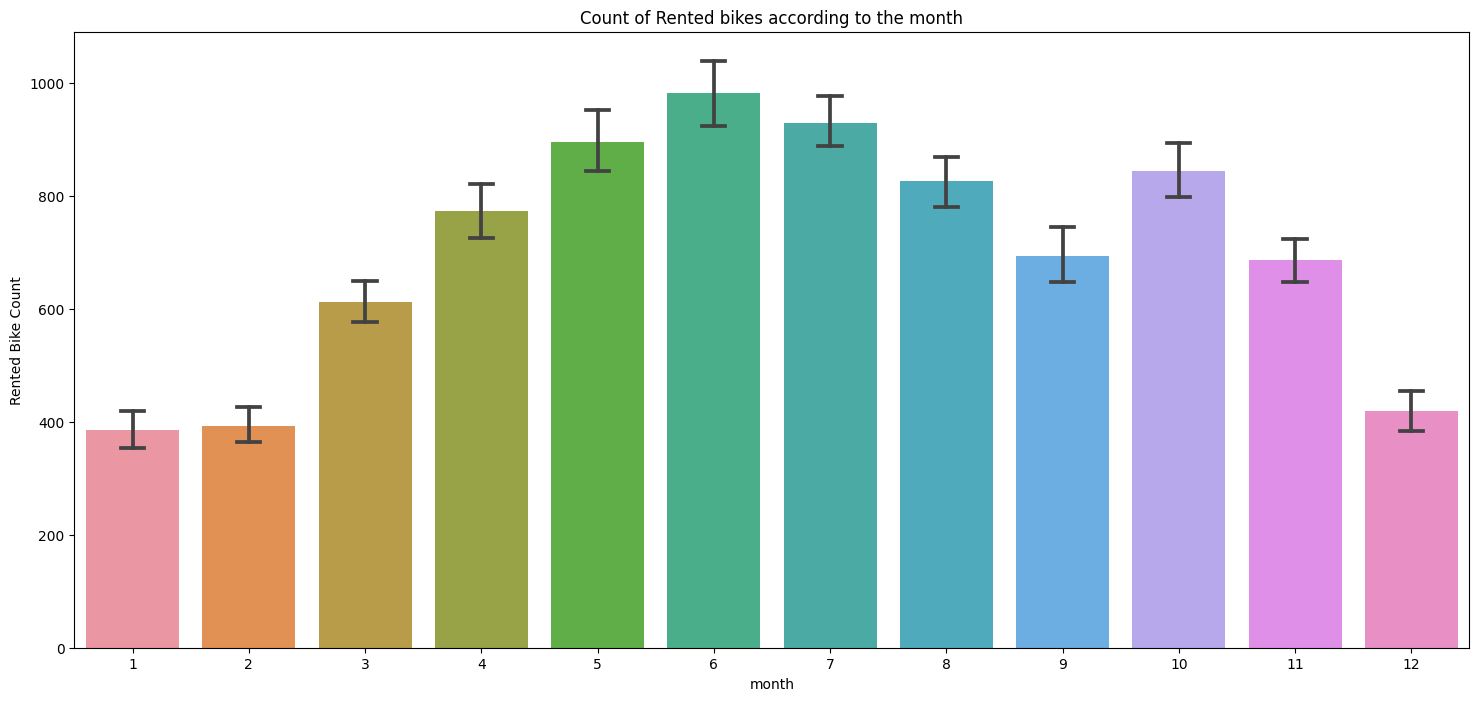

In [ ]:
#Data visualization according to the booking by month
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to the month')
plt.show()

Most booking of the bikes according to the month is June than the other month.

***counted of rented bikes according to booking of hour***

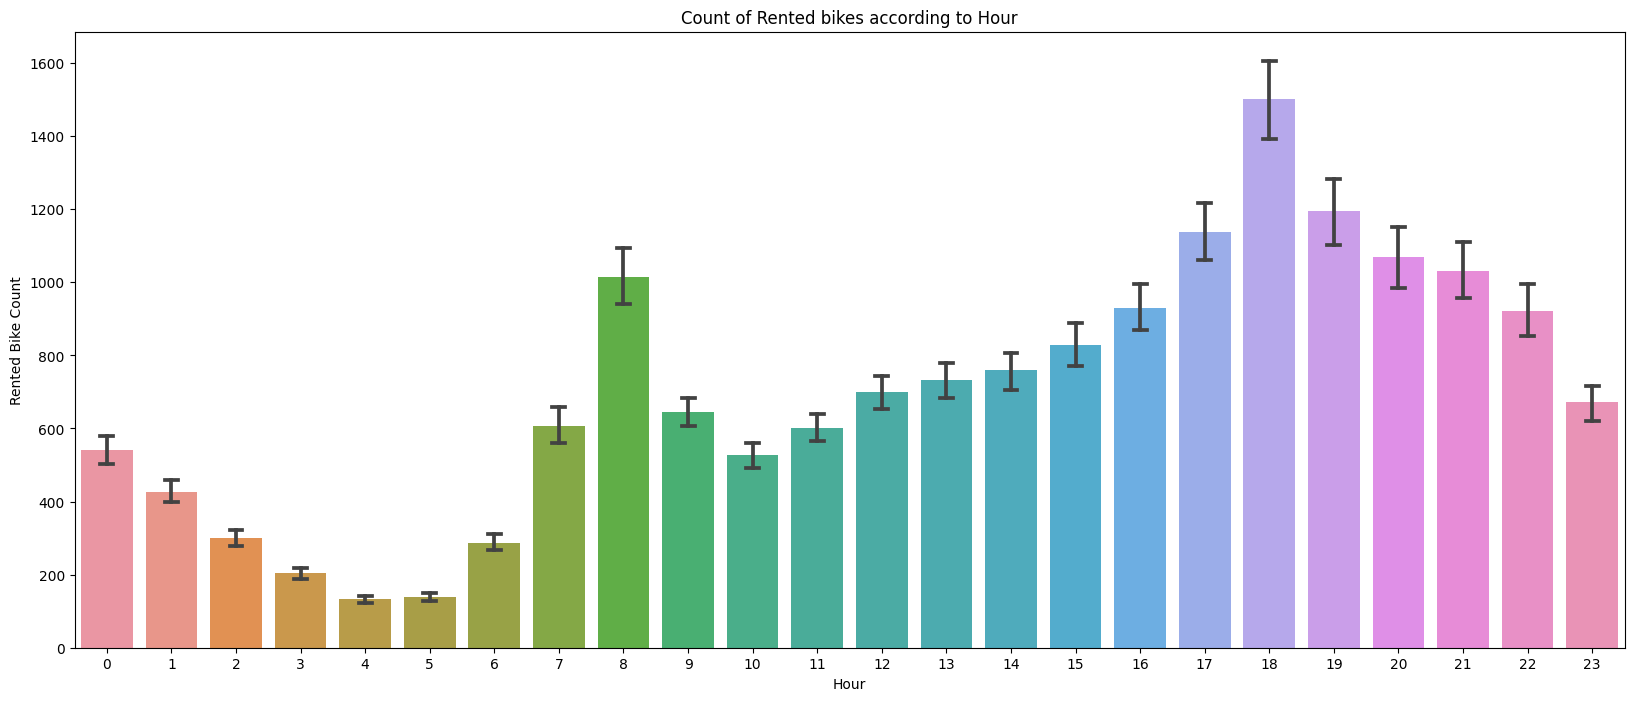

In [ ]:
#Data Visualization of according to booking by hour
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Hour')
plt.show()

Above plot shows the use of rented bike hourly and we found that usually people use rented bikes during their working hours from 7 am to 9 am and 5 pm to 7 pm.

***Count of rented bikes according to holiday***

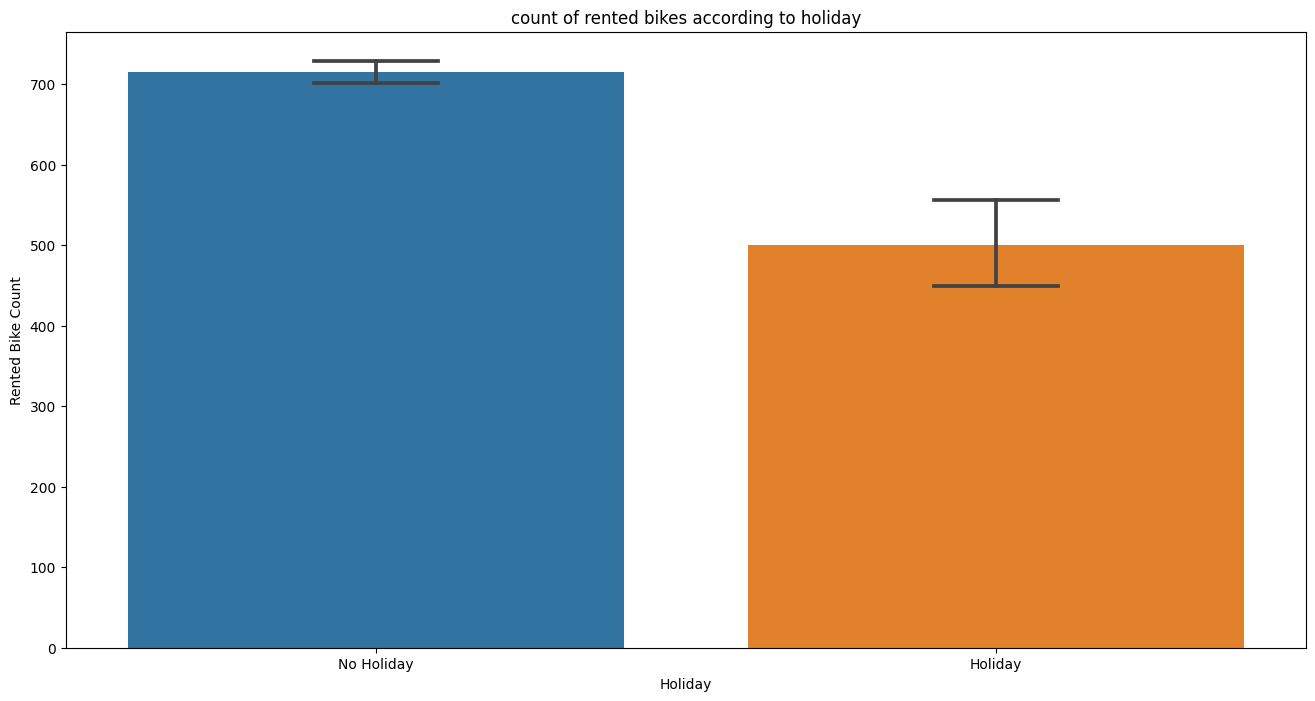

In [ ]:
# Data Visualization of rented bikes according to holiday bookings
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='count of rented bikes according to holiday')
plt.show()

From above bar plot we shows that if there any holiday the rented bike booking is less.And if there no holiday the rented bike booking is high.

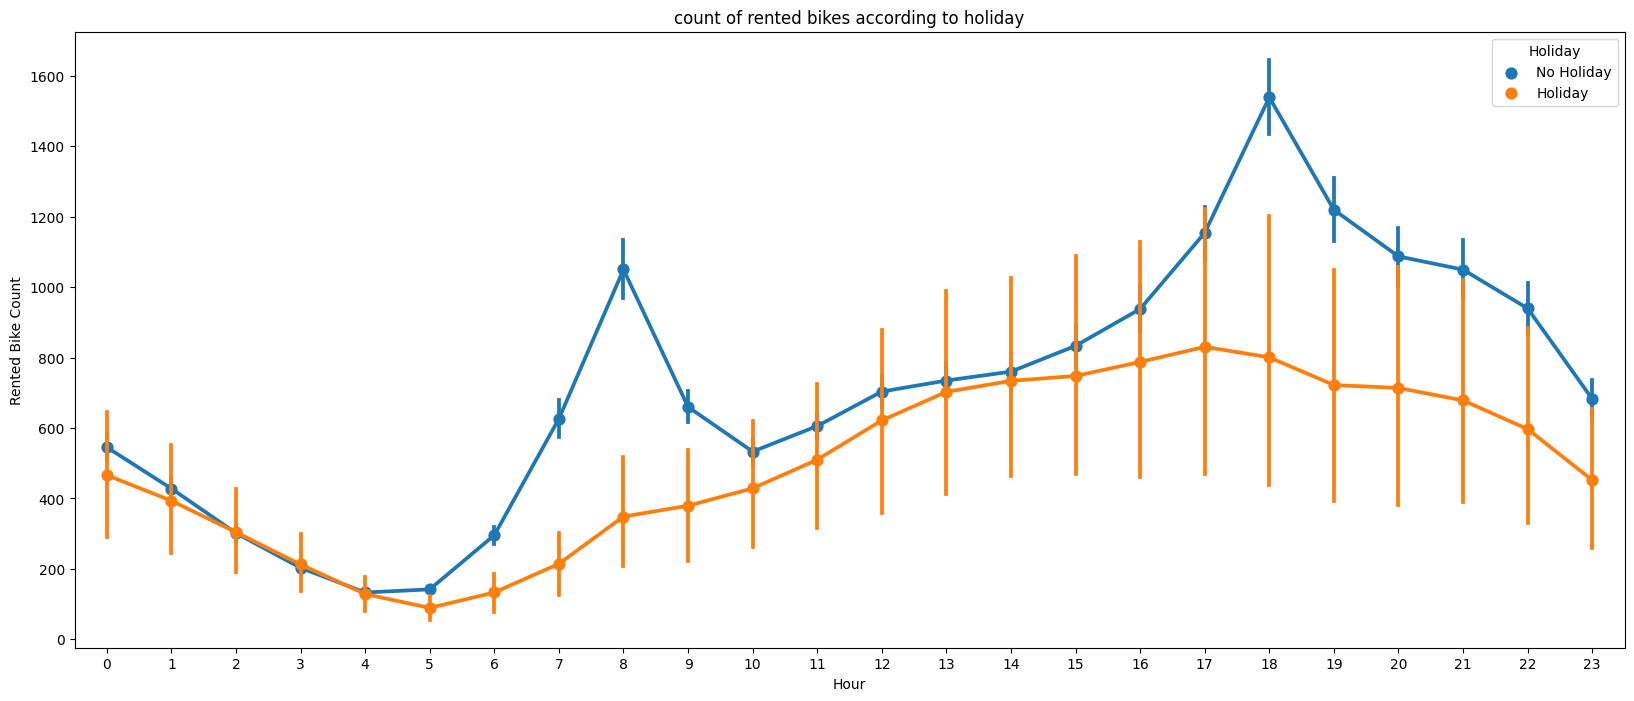

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='count of rented bikes according to holiday')
plt.show()

From above pointplot shows that the less number of rented bike bookings occurs on the Holiday. And more rented bike books on no holidays.And the booking timing is 7 to 9am and 5 to 7pm is very high.

***Booking of rented bikes according to seasons***

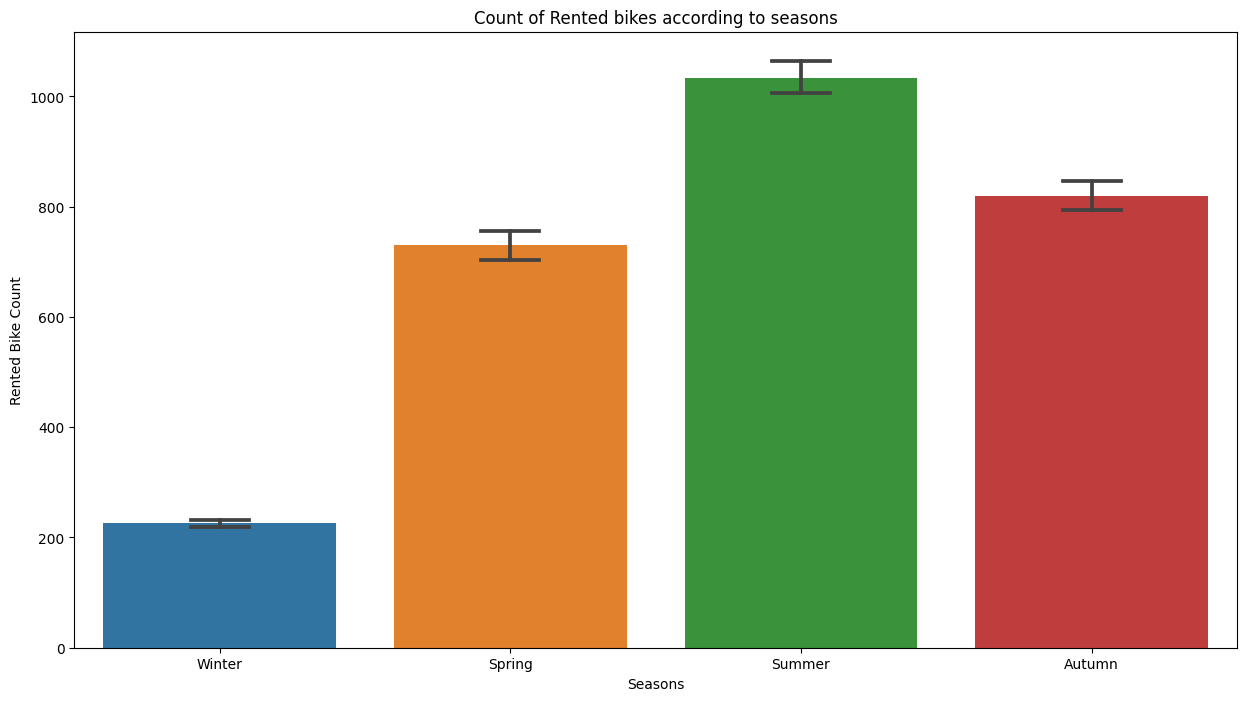

In [ ]:
# Data visualization of the booking of rented bikes according to seasons
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to seasons')
plt.show()

From above barplot we found that the most busy booking season is summer rather than the other seasons.

**Numerical Vs Rented_Bike_Count**